# COURSEWORK SPECIFICATION

## COM1011 - Fundamentals of Machine Learning

**Module Leader:** Chico Camargo

**Academic Year:** 2025/26

**Title:** Coursework 1

**Submission deadline:** 3rd November 2025, 12:00pm(noon).

This assessment contributes **30%** of the total module mark and assesses the following intended learning outcomes:

1. Understanding and identifying the compromises and trade-offs that must be made when using a machine learning approach;
2. Analysing problems from a data-centric point of view, choosing among a range of supervised and unsupervised machine learning techniques and using relevant software libraries to solve them
3. Stating the importance and difficulty of establishing machine learning solutions; 
4. Using elementary python for implementing machine learning algorithms. 
5. Identifying the compromises that must be made when translating theory into practice; 

**This is an individual assessment** and you are reminded of the University's regulations on collaboration and plagiarism. You must avoid plagiarism, collusion, and any academic misconduct behaviours. Further details about academic honesty and plagiarism can be found at https://ele.exeter.ac.uk/course/view.php?id=1957.

__________________________

# What to submit

You are required to submit your assignment **3rd November 2025 at 12:00pm(noon)**.

Please do all your work in this Jupyter notebook. Make a separate cell for every few lines of code, and use separate cells for text, like this one.
Save your file in the format `COM1011_STUDENTNUMBER.ipynb` and zip it.
For example, if your student number is 12345678, save your coursework as `COM1011_12345678.ipynb`.
Once you have done that, zip the file, producing a file called `COM1011_12345678.zip`. This is the file you will have to upload and submit to ELE.

This assignment will also use three additional files, named `AmesHousingSimple.csv`, `mnist_train.csv`, and `mnist_test.csv`. Do not include them in the `COM1011_STUDENTNUMBER.zip` file.

# Answer template

Please use this notebook for your coursework. Feel free to add more cells for your code and answers, but try to stick to this format. This will make it easier to mark everyone's work fairly.

___________________

In [4]:
# Run this cell so we know the versions of all libraries in your computer
!pip list

Package                 Version
----------------------- -----------
asttokens               3.0.0
colorama                0.4.6
comm                    0.2.3
contourpy               1.3.3
cycler                  0.12.1
debugpy                 1.8.17
decorator               5.2.1
executing               2.2.1
fonttools               4.60.1
ipykernel               7.1.0
ipython                 9.6.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
joblib                  1.5.2
jupyter_client          8.6.3
jupyter_core            5.9.1
kiwisolver              1.4.9
matplotlib              3.10.7
matplotlib-inline       0.2.1
nest-asyncio            1.6.0
numpy                   2.3.4
packaging               25.0
pandas                  2.3.3
parso                   0.8.5
pillow                  12.0.0
pip                     25.3
platformdirs            4.5.0
prompt_toolkit          3.0.52
psutil                  7.1.2
pure_eval               0.2.3
Pygments                2.1

# Part A - AmesHousing Dataset: Linear Regression Analysis

This part of the assignment is based on the AmesHousing Dataset, which contains information about various features of houses.
It is  real estate dataset from Ames, Iowa (USA) compiled by Dean De Cock for teaching data science. About 2,930 residential property sales with 80–82 features describing each house.
The original Ames dataset has over 80 features (such as lot size, number of rooms, garage details, neighborhood, etc.). To keep things clear and focused, we have reduced it to 7 numeric features + 1 target variable.
Target feature (what we predict): SalePrice (final sale price in USD).



____________________

## 1. Data Preparation (5 points)

1.1. Load the AmesHousingsimple.csv dataset, display the first 5 rows, and report the dataset’s shape and missing value statistics. (1 point)

1.2. Visualize the dataset:  Create scatterplots to explore the relationship between features and the target variable SalePrice. Here we want to plot the scatterplots Gr Liv Area VS SalePrice. (1 points).


-- Q1.1 --
>> First 5 rows of dataset:
-------------------------------------------------------------------------------------------------------
   Lot Area  Overall Qual  Overall Cond  Year Built  Gr Liv Area  Bedroom AbvGr  Garage Cars  SalePrice
0   31770.0           6.0           5.0      1960.0       1656.0            3.0          2.0     215000
1   11622.0           5.0           6.0         NaN        896.0            2.0          1.0     105000
2   14267.0           6.0           NaN      1958.0       1329.0            3.0          1.0     172000
3   11160.0           7.0           5.0      1968.0       2110.0            3.0          2.0     244000
4   13830.0           5.0           5.0      1997.0       1629.0            3.0          2.0     189900

>> This dataset's shape consists of 2930 rows and 8 columns

>> Missing values for each column:
Lot Area         146
Overall Qual     146
Overall Cond     146
Year Built       146
Gr Liv Area      146
Bedroom AbvGr    146
Garage Car

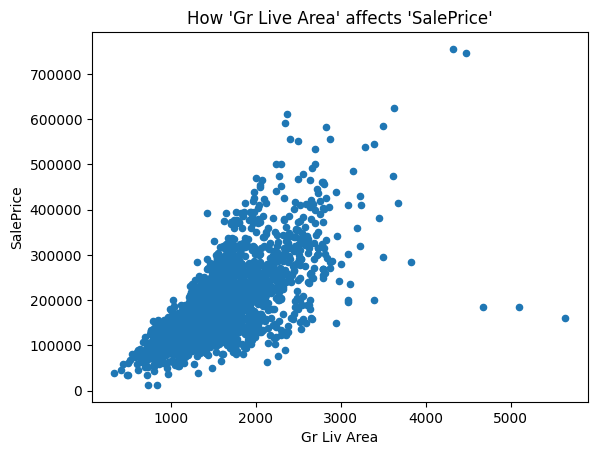

In [3]:
# Answers here
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

###########
## Q 1.1 ##
###########
print("-- Q1.1 --")

# Load the csv file into a Pandas DataFrame
df = pd.read_csv("AmesHousingSimple.csv")

# Display the first 5 rows of the dataset
# Also: df.loc[[0,1,2,3,4]]
print(">> First 5 rows of dataset:\n-------------------------------------------------------------------------------------------------------")
print(df.head().to_string())

# Display the dataset's shape
print(f"\n>> This dataset\'s shape consists of {df.shape[0]} rows and {df.shape[1]} columns")
# Store the number of rows currently, for use in Q1.4
originalNumberOfRows = df.shape[0]

# Display how many missing values there are in each column
print(f"\n>> Missing values for each column:\n{df.isnull().sum()}")

# Display how many missing values there are in the dataset in total
print(f"\n>> There are {df.isnull().sum().sum()} missing values in the dataset in total\n\n")




###########
## Q 1.2 ##
###########
# Question implied that it only required one scatter plot
print("-- Q1.2 --")

# Plot a scatter graph of 'Gr Live Area' on the x-axis and 'SalePrice' on the y-axis
df.plot(kind="scatter", x="Gr Liv Area", y="SalePrice", title="How \'Gr Live Area\' affects \'SalePrice\'")

# Use matplotlib.pyplot to display this graph
plt.show()


1.3. For each column, report how many values are missing. Which feature has the most missing values? （1 point）

In [4]:
# Answers here
# Display the number of missing values for each column
print(f"Number of missing values for each column:\n{df.isnull().sum()}\n")

# Report which column has the most missing values
# "df.isnull().sum()" is a Pandas Series, i.e. a list with custom index labels
largestColumnValue = 0    # Number of missing values in the largest column
listOfNullValues = df.isnull().sum()

# Loop through each column and the number of missing values it has
for i in range(len(listOfNullValues)):
    # Check if the current number of null values is greater than the largest found so far
    if listOfNullValues.iloc[i] > largestColumnValue:
        # Store the new largest number of null values found
        largestColumnValue = listOfNullValues.iloc[i]
        # Store which coloumn has the current largest
        largestColumn = listOfNullValues.index[i]

print(f"{largestColumn} is the feature with the most missing values; {largestColumnValue}.")



Number of missing values for each column:
Lot Area         146
Overall Qual     146
Overall Cond     146
Year Built       146
Gr Liv Area      146
Bedroom AbvGr    146
Garage Cars      147
SalePrice          0
dtype: int64

Garage Cars is the feature with the most missing values; 147.


1.4. Try one imputation strategies for missing values (1 point)

In [5]:
# Answers here
# One strategy for dealing with missing values is to remove the record/row entirely
# Removes all rows that contain a missing value, "inplace=True" means change the existing DataFrame
df.dropna(inplace=True)

# Display the new dataset
print(df.to_string())

# Output how many rows this modified dataset contains
print(f"\nThe modified dataset\'s shape consists of {df.shape[0]} rows, down from {originalNumberOfRows}!")

      Lot Area  Overall Qual  Overall Cond  Year Built  Gr Liv Area  Bedroom AbvGr  Garage Cars  SalePrice
0      31770.0           6.0           5.0      1960.0       1656.0            3.0          2.0     215000
3      11160.0           7.0           5.0      1968.0       2110.0            3.0          2.0     244000
4      13830.0           5.0           5.0      1997.0       1629.0            3.0          2.0     189900
5       9978.0           6.0           6.0      1998.0       1604.0            3.0          2.0     195500
6       4920.0           8.0           5.0      2001.0       1338.0            2.0          2.0     213500
7       5005.0           8.0           5.0      1992.0       1280.0            2.0          2.0     191500
8       5389.0           8.0           5.0      1995.0       1616.0            2.0          2.0     236500
9       7500.0           7.0           5.0      1999.0       1804.0            3.0          2.0     189000
12      8402.0           6.0         

1.5. Calculate the correlation matrix between all numeric features in the dataset and plot the correlation matrix as a heatmap to visualize relationships between features and SalePrice.(1 point)(1 points).

In [6]:
# Answers here
# Display the correlation matrix for the df dataset
#print(f"Correlation Matrix:\n{df.corr().to_string()}")

# Calculate the correlation matrix
corrMatrix = df.corr()

# Calculate the two features with the highest correlation
highestCorr = 0
feature1 = ""
feature2 = ""
numOfRows = df.shape[1]

# loop through each row
for j in range(numOfRows):
    # Store the current row
    row = corrMatrix.iloc[j]
    # Loop through each corr value in each row
    for k in range(numOfRows):
        # Store the absolute value of the corr value
        corrValue = row.iloc[k]
        # Checks if the current corr value is larger than the highest so far and <1
        if (abs(corrValue) > highestCorr) and (abs(corrValue) < 1):
            # Store the new highest corr value
            highestCorr = corrValue
            # Store the two features that this corr value is between
            feature1 = corrMatrix.index[j]
            feature2 = corrMatrix.index[k]

# Output which two features have the highest correlation
print(f">> \'{feature1}\' and \'{feature2}\' have the highest correlation of {round(highestCorr, 4)}.")

# Display the correlation matrix as a heatmap
print("Correlation matrix displayed as a heatmap:")
corrMatrix.style.format("{:.4f}").background_gradient(cmap="coolwarm")

>> 'Overall Qual' and 'SalePrice' have the highest correlation of 0.8054.
Correlation matrix displayed as a heatmap:


,Lot Area,Overall Qual,Overall Cond,Year Built,Gr Liv Area,Bedroom AbvGr,Garage Cars,SalePrice
Lot Area,1.0000,0.1016,-0.0699,0.0296,0.2795,0.1407,0.1809,0.2699
Overall Qual,0.1016,1.0000,-0.0914,0.5892,0.5705,0.0716,0.5905,0.8054
Overall Cond,-0.0699,-0.0914,1.0000,-0.3692,-0.1015,0.0029,-0.1902,-0.0956
Year Built,0.0296,0.5892,-0.3692,1.0000,0.2232,-0.0650,0.5429,0.5542
Gr Liv Area,0.2795,0.5705,-0.1015,0.2232,1.0000,0.5351,0.4636,0.7155
Bedroom AbvGr,0.1407,0.0716,0.0029,-0.0650,0.5351,1.0000,0.0895,0.1497
Garage Cars,0.1809,0.5905,-0.1902,0.5429,0.4636,0.0895,1.0000,0.6414
SalePrice,0.2699,0.8054,-0.0956,0.5542,0.7155,0.1497,0.6414,1.0000


## 2. Linear Regression (20 points)

Implement a linear regression model using only the 'Overall Qual', 'Year Built' and 'Bedroom AbvGr ' features to predict 'SalePrice'.

2.1 Separate the dataset into features (X) and target (y = SalePrice). Split into training and testing sets (80/20 split). (2 points)

In [7]:
# Answers here
# Create a new dataset containing the predictors (features); "Overall Qual", "Year Built" and "Bedroom AbvGr"
predictorDataset = df[["Overall Qual", "Year Built", "Bedroom AbvGr"]].copy()

# Create a new data series containing the target "SalePrice"
targetDataSeries = df["SalePrice"]

# Use train_test_split from the sklearn module to split the dataset up into train and test subsets
# This way the split is more random than simply spliting the dataset at a point
# "test_size=0.2" means 20% test and 80% train
# "random_state=42" allows the random shuffle to be reproduced
predictorTrain, predictorTest, targetTrain, targetTest = train_test_split(predictorDataset, targetDataSeries, test_size=0.2, random_state=42)



# Old version for train-test split
# Split the dataset into training and testing sets
# Calculate the 80/20 split
#numOfRows = df.shape[0]
#numOfRowsForTrain = round(numOfRows * 0.8)
#numOfRowsForTest = numOfRows - numOfRowsForTrain

# Training and testing dataset for the predictors
#predictorTrainingDataset = predictorDataset.head(numOfRowsForTrain)
#predictorTestingDataset = predictorDataset.tail(numOfRowsForTest)

# Training and testing data series for the target
#targetTrainingDataSeries = targetDataSeries.head(numOfRowsForTrain)
#targetTestingDataSeries = targetDataSeries.tail(numOfRowsForTest)

2.2. Fit the model on the training data and make predictions on the test data. (4 points)

In [8]:
# Answers here
# Create the linear model
model = LinearRegression()
# Fit the model to the training data
model.fit(predictorTrain, targetTrain)

# Predict the target based on the training set
predictedTargetTrain = model.predict(predictorTrain)

# Predict the target based on the testing set
predictedTargetTest = model.predict(predictorTest)

2.3. Calculate and print the Mean Squared Error (MSE) and R-squared score for both training and test sets. (3 points)

In [9]:
# Answers here
# Calculate stats based on the predicted values from training set
# Mean Squared Error
mseTrain = round(mean_squared_error(targetTrain, predictedTargetTrain), 4)
# Mean Absolute Error
maeTrain = round(mean_absolute_error(targetTrain, predictedTargetTrain), 4)
# R^2 value
r2Train = round(r2_score(targetTrain, predictedTargetTrain), 4)

# Calculate stats based on the predicted values from testing set
# Mean Squared Error
mseTest = round(mean_squared_error(targetTest, predictedTargetTest), 4)
# Mean Absolute Error
maeTest = round(mean_absolute_error(targetTest, predictedTargetTest), 4)
# R^2 value
r2Test = round(r2_score(targetTest, predictedTargetTest), 4)

# Output the stats for the training set
print(f"Training set:\nM.S.E = {mseTrain}\nM.A.E = {maeTrain}\nR^2 = {r2Train}\n")
# Output the stats for the testing set
print(f"Testing set:\nM.S.E = {mseTest}\nM.A.E = {maeTest}\nR^2 = {r2Test}")

Training set:
M.S.E = 2107054244.9278
M.A.E = 32103.4818
R^2 = 0.6605

Testing set:
M.S.E = 2248214539.3728
M.A.E = 32544.7457
R^2 = 0.6967


2.4. Make a scatterplot comparing the actual 'SalePrice' values vs. the predicted 'SalePrice' values. (3 points)

Text(0.5, 1.0, 'Values from the Testing Dataset')

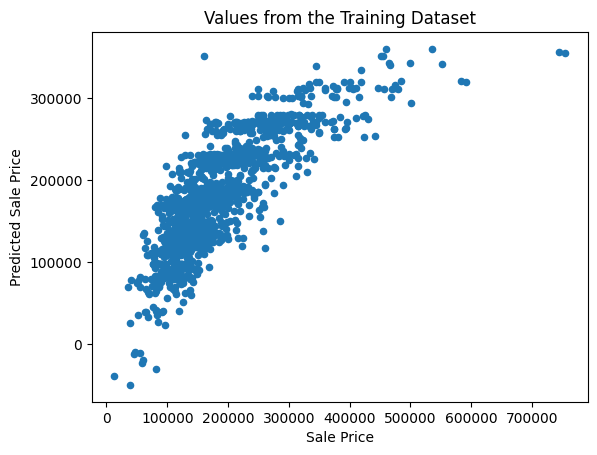

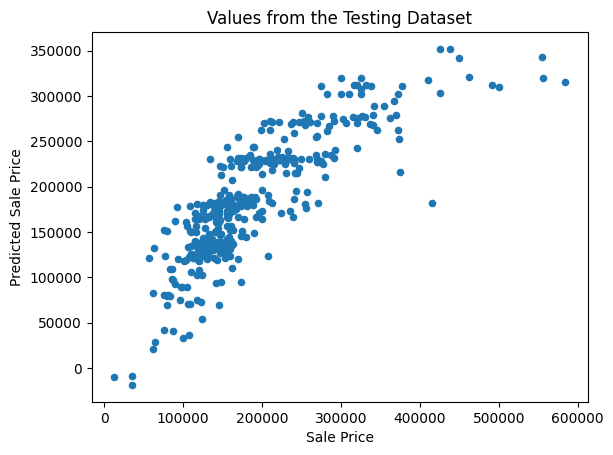

In [10]:
# Answers here
# Display a scatter plot of "SalePrice" vs pred. "SalePrice" on the training dataset
# Combine "targetTrain" and "predictedTargetTrain" into a pandas dataframe
trainPredictedDataset = pd.DataFrame({
    "Sale Price" : targetTrain,
    "Predicted Sale Price" : predictedTargetTrain
})

# Plot the scatter plot, labeling the axes and giving the graph a title
trainPredictedDataset.plot.scatter(x="Sale Price", y="Predicted Sale Price").set_title("Values from the Training Dataset")


# Display a scatter plot of "SalePrice" vs pred. "SalePrice" on the testing dataset
# Combine "targetTest" and "predictedTargetTest" into a pandas dataframe
testPredictedDataset = pd.DataFrame({
    "Sale Price" : targetTest,
    "Predicted Sale Price" : predictedTargetTest
})

# Plot the scatter plot, labeling the axes and giving the graph a title
testPredictedDataset.plot.scatter(x="Sale Price", y="Predicted Sale Price").set_title("Values from the Testing Dataset")

2.5.  Implement a linear regression model using all features. (3 points).

In [11]:
# Answers here
# Create a new dataset that contains all the features, excluding the target
predictorDatasetAll = df.drop(columns="SalePrice").copy()

# The target data series is "targetDataSeries"

# Use train_test_split to split the data into 80% train and 20% test
predictorTrain, predictorTest, targetTrain, targetTest = train_test_split(predictorDatasetAll, targetDataSeries, test_size=0.2, random_state=48)

# Create a new regression model and fit it on the training data
allFeatureModel = LinearRegression().fit(predictorTrain, targetTrain)

# Using the new model, predict the target
newPredictedTarget = allFeatureModel.predict(predictorTest)

2.6.  Make a scatterplot comparing the actual 'SalePrice' values vs. the predicted 'SalePrice' values. (2 points).

Text(0.5, 1.0, 'Predicted Sale Price using new model')

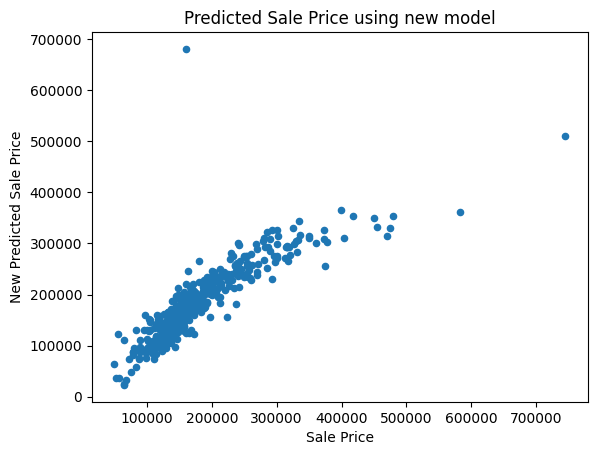

In [12]:
# Answers here
# Combine the new predicted target values with the original values into a dataframe
newPredictedDataset = pd.DataFrame({
    "Sale Price" : targetTest,
    "New Predicted Sale Price" : newPredictedTarget
})

# Plot a scatter plot using this new dataset
newPredictedDataset.plot.scatter(x="Sale Price", y="New Predicted Sale Price").set_title("Predicted Sale Price using new model")

2.7.  Compare its performance with the simple linear regression model using the metrics discussed so far. Which one does better? Print the result. (3 points)

In [13]:
# Answers here
# Calculate the r2 value for the new model on the test data
newR2 = round(r2_score(targetTest, predictedTargetTest), 4)
# Calculate the Mean Squared Error for the new model on the test data
newMSE = round(mean_squared_error(targetTest, predictedTargetTest), 4)

# The R2 and M.S.E values for the previous model are "r2Test" and "mseTest"

# Compare the two R^2 values
if (abs(newR2) > abs(r2Test)):
    print(f">> The new model is a better fit since it has a stronger correlation value of {"{:,}".format(newR2)} compared to {r2Test}.")
else:
    print(f">> The old model is a better fit since it has a stronger correlation value of {"{:,}".format(r2Test)} compared to {"{:,}".format(newR2)}.")

# Compare the two M.S.E values
if (newMSE < mseTest):
    print(f">> The new model has a lower M.S.E value of {"{:,}".format(newMSE)} compared to {"{:,}".format(mseTest)}.")
else:
    print(f">> The old model has a lower M.S.E value of {"{:,}".format(mseTest)} compared to {"{:,}".format(newMSE)}.")

>> The old model is a better fit since it has a stronger correlation value of 0.6967 compared to -0.4695.
>> The old model has a lower M.S.E value of 2,248,214,539.3728 compared to 9,983,793,844.3401.


_______________

## 3. Comparing Linear Regression with Polynomial Regression (15 points)

3.1. Implement a linear regression model and a polynomial regression model with degree 2 (a quadratic equation) using the 'Gr Liv Area' feature to predict 'SalePrice'. Do a train-test split, and compare how they perform by printing off their R² values and MSE on both the train and test data. (4 points)

In [14]:
# Answers here
# Separate the feature/predictor from the target
featureDataSeries = df[["Gr Liv Area"]]
targetDataSeries = df[["SalePrice"]]

# Perform a train-test split on the two data series
# 80% train and 20% test
featureTrain, featureTest, targetTrain, targetTest = train_test_split(featureDataSeries, targetDataSeries, test_size=0.2, random_state=36)


# >>LINEAR REGRESSION MODEL<<
# Create and fit a linear regression model to the training data
linearModel = LinearRegression().fit(featureTrain, targetTrain)

# Using the linear model, predict the target
linearPredictTarget = linearModel.predict(featureTest)


# >>POLYNOMIAL REGRESSION MODEL<<
# Create the polynomial features
poly = PolynomialFeatures(degree=2)
featurePoly = poly.fit_transform(featureTrain)

# Fit a linear model to the polynomial data, create a polynomial model
polyModel = LinearRegression().fit(featurePoly, targetTrain)

# Using the polynomial model, predict the target
polyPredictTarget = polyModel.predict(poly.fit_transform(featureTest))


# Report some stats about each model
# >>LINEAR<<
print(">>LINEAR MODEL<<")
print("Training Stats:")
print(f"  R^2: {round(r2_score(targetTrain, linearModel.predict(featureTrain)), 4)}")
print(f"  M.S.E: {"{:,}".format(round(mean_squared_error(targetTrain, linearModel.predict(featureTrain)), 4))}")
print("Testing Stats:")
print(f"  R^2: {round(r2_score(targetTest, linearPredictTarget), 4)}")
print(f"  M.S.E: {"{:,}".format(round(mean_squared_error(targetTest, linearPredictTarget), 4))}")

# >>POLYNOMIAL<<
print("\n>>POLYNOMIAL MODEL<<")
print("Training Stats:")
print(f"  R^2: {round(r2_score(targetTrain, polyModel.predict(featurePoly)), 4)}")
print(f"  M.S.E: {"{:,}".format(round(mean_squared_error(targetTrain, polyModel.predict(featurePoly)), 4))}")
print("Testing Stats:")
print(f"  R^2: {round(r2_score(targetTest, polyPredictTarget), 4)}")
print(f"  M.S.E: {"{:,}".format(round(mean_squared_error(targetTest, polyPredictTarget), 4))}")

print("\nAs you can see, the polynomial model is marginally better than the linear model.")

>>LINEAR MODEL<<
Training Stats:
  R^2: 0.5062
  M.S.E: 3,181,121,563.9332
Testing Stats:
  R^2: 0.5343
  M.S.E: 3,024,263,243.6211

>>POLYNOMIAL MODEL<<
Training Stats:
  R^2: 0.5088
  M.S.E: 3,164,904,055.4756
Testing Stats:
  R^2: 0.5357
  M.S.E: 3,015,116,236.5998

As you can see, the polynomial model is marginally better than the linear model.


3.2.  Create a scatter plot showing the predictions of both linear and polynomial models on the same graph, against the actual data. (3 points)

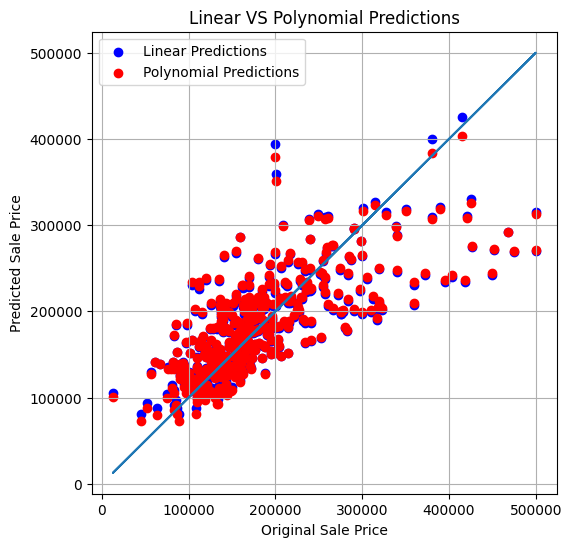

In [15]:
# Answers here
# Create a new blank canvas ready for the plot and setting the size to 6x6 inches
plt.figure(figsize=(6,6))

# Draw the first dataset onto a scatter plot
plt.scatter(targetTest, linearPredictTarget, color="blue", label="Linear Predictions")

# Draw the second dataset onto a scatter plot
plt.scatter(targetTest, polyPredictTarget, color="red", label="Polynomial Predictions")

# Plot a linear y = x line for reference
plt.plot(targetTest, targetTest)

# Add axes labels
plt.xlabel("Original Sale Price")
plt.ylabel("Predicted Sale Price")

# Set plot title
plt.title("Linear VS Polynomial Predictions")

# Display the labels
plt.legend()

# Display a faint grid in the background
plt.grid(True)

# Renders the plot
plt.show()

3.3. Implement polynomial regression with degrees 1, 2, 3, and 4 using ALL features. First, plot the fitted regression curves for each degree on top of the data. Then, perform cross-validation and plot the mean squared error (MSE) for each degree to compare their performances. (4 points)

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

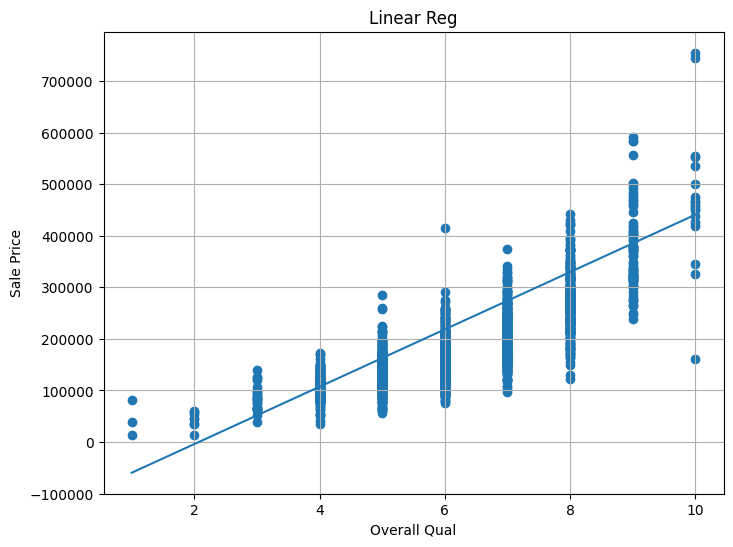

Quadratic Reg: R^2 = 0.8948799485895118


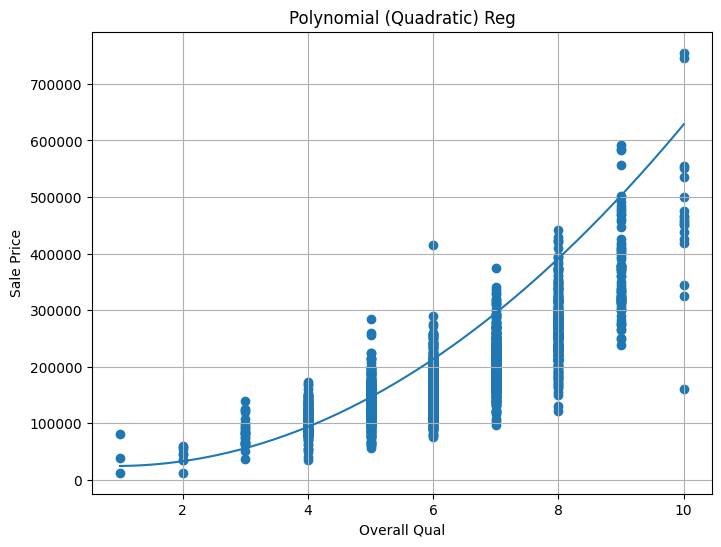

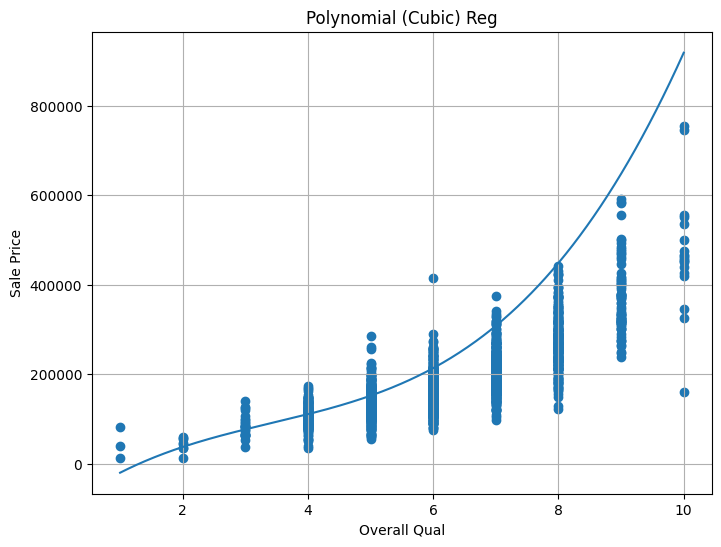

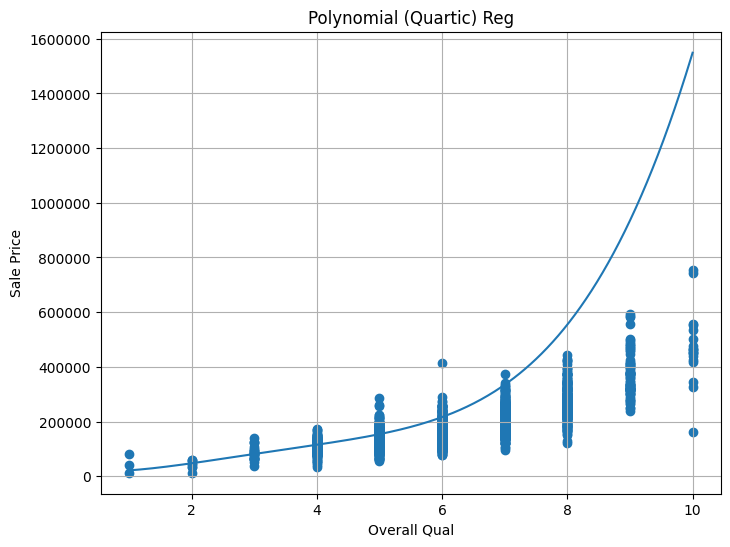


=== Cross-Validation Results ===
Degree 1: MSE = 1,299,618,220 (+/- 303,756,701)
Degree 2: MSE = 1,692,520,493 (+/- 1,180,341,509)
Degree 3: MSE = 4,667,854,640 (+/- 7,527,937,905)
Degree 4: MSE = 6,847,894,374,528 (+/- 13,563,053,072,015)


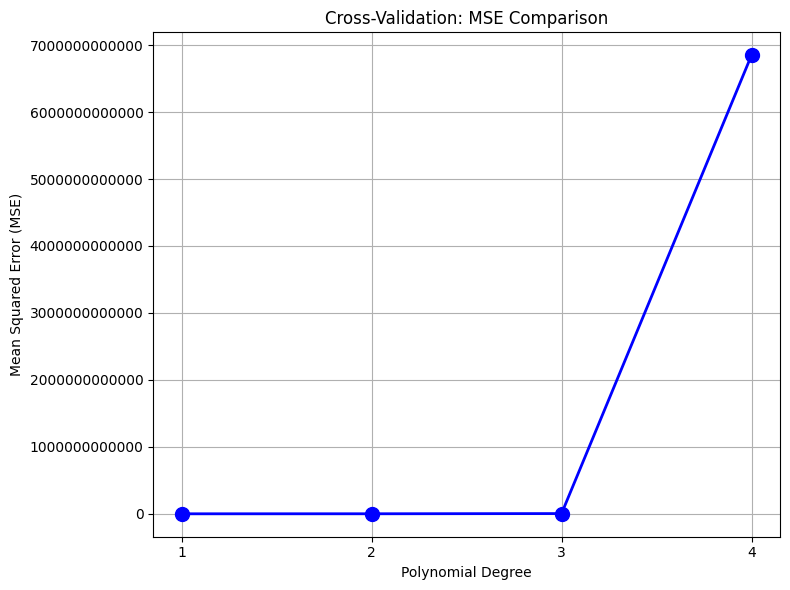


Best polynomial degree: 1 (lowest MSE: 1,299,618,220)


In [16]:
# Answers here
from sklearn.model_selection import cross_val_score

# Interpretation of question:
# For each poly degree (1,2,3,4) plot a scatter graph of most correlated feature (x-axis) 
# against SalPrice (y-axis) with the reg curve ontop of the data


# Split the data into features and target
featureDataset = df.drop(columns="SalePrice").copy()
targetDataset = df[["SalePrice"]].copy()

# Split the two datasets into train and test sets
featureTrain, featureTest, targetTrain, targetTest = train_test_split(featureDataset, targetDataset, test_size=0.2, random_state=32)


# Create a smooth list of nums for each feature, used to plot reg curve
featureCurveNums = pd.DataFrame({
    "Lot Area": np.linspace(featureTest["Lot Area"].min(), featureTest["Lot Area"].max(), len(featureTest)),
    "Overall Qual": np.linspace(featureTest["Overall Qual"].min(), featureTest["Overall Qual"].max(), len(featureTest)),
    "Overall Cond": np.linspace(featureTest["Overall Cond"].min(), featureTest["Overall Cond"].max(), len(featureTest)),
    "Year Built": np.linspace(featureTest["Year Built"].min(), featureTest["Year Built"].max(), len(featureTest)),
    "Gr Liv Area": np.linspace(featureTest["Gr Liv Area"].min(), featureTest["Gr Liv Area"].max(), len(featureTest)),
    "Bedroom AbvGr": np.linspace(featureTest["Bedroom AbvGr"].min(), featureTest["Bedroom AbvGr"].max(), len(featureTest)),
    "Garage Cars": np.linspace(featureTest["Garage Cars"].min(), featureTest["Garage Cars"].max(), len(featureTest))
})


# Loop to create each regression model
for i in range(1,5):
    # Create the poly features
    poly = PolynomialFeatures(degree=i)
    featurePoly = poly.fit_transform(featureTrain)

    # Fit the reg model
    polyModel = LinearRegression().fit(featurePoly, targetTrain)

    # Predict the SalePrice using the values in "featureCurveNums", used for plotting the reg curve
    predictedTargetValues = polyModel.predict(poly.transform(featureCurveNums))

    # Predicted values based on test set
    predictedValues = polyModel.predict(poly.transform(featureTest))

    # Set the figure size of the graph
    plt.figure(figsize=(8,6))
    # Plot a scatter plot of "Overall Qual" (x-axis) and "SalePrice" (y-axis)
    plt.scatter(df["Overall Qual"], df["SalePrice"])
    # Plot the reg curve
    plt.plot(featureCurveNums["Overall Qual"], predictedTargetValues)
    # Set the axes labels and title
    plt.xlabel("Overall Qual")
    plt.ylabel("Sale Price")
    match i:
        case 1: plt.title("Linear Reg")
        case 2: 
            plt.title("Polynomial (Quadratic) Reg")
            print(f"Quadratic Reg: R^2 = {r2_score(targetTest, predictedValues)}")
        case 3: plt.title("Polynomial (Cubic) Reg")
        case 4: plt.title("Polynomial (Quartic) Reg")
    plt.grid(True)
    plt.ticklabel_format(style='plain', axis='y')  # Avoid scientific notation
    plt.show()


# Cross-Valiidation
print("\n=== Cross-Validation Results ===")
degrees = [1, 2, 3, 4]
mse_scores = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(featureDataset)
    
    # Perform 5-fold cross-validation
    # Note: cross_val_score returns negative MSE, so we negate it
    scores = cross_val_score(
        LinearRegression(), 
        X_poly, 
        targetDataset, 
        cv=5,  # 5-fold cross-validation
        scoring='neg_mean_squared_error'
    )
    
    # Convert negative MSE to positive and get mean
    mse = -scores.mean()
    mse_std = scores.std()
    mse_scores.append(mse)
    
    print(f"Degree {degree}: MSE = {mse:,.0f} (+/- {mse_std:,.0f})")

# Plot MSE vs Degree
plt.figure(figsize=(8, 6))
plt.plot(degrees, mse_scores, marker='o', linewidth=2, markersize=10, color='blue')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Cross-Validation: MSE Comparison")
plt.grid(True)
plt.xticks(degrees)
plt.ticklabel_format(style='plain', axis='y')  # Avoid scientific notation
plt.tight_layout()
plt.show()

# Print the best degree
best_degree = degrees[np.argmin(mse_scores)]
print(f"\nBest polynomial degree: {best_degree} (lowest MSE: {min(mse_scores):,.0f})")

3.4. Discuss the trade-offs between model complexity and performance. Consider concepts such as overfitting, underfitting, and the bias-variance tradeoff. (4 points)

*Answers here (double click to edit this cell)*

Having a very simply regression model, such as a linear model, would result in high performance (simply calculations) but low predictive accuracy. This is known as underfitting, where the model doesn't learn the patterns in the data. Underfitted models are simple (less complex). Increasing the complexity of the model results in more accurate predictions but slower computation. An example of a more complex regression model is a quadratic model. This, along with cubic, quartic, etc, are exampels fo polynomial regression models. These models can learn and fit the data more accurately. The higher the polynomial degree, the more the model fits the training data. Overfitting is where the model tries to account for every data point in the training dataset. This results in a model that has very high predictive power on the training data, but very low predictive power on unseen data (test data). For a good model that can generalise as well as understanding the patterns in the data, you need a balence/compromise, high enough polynomial degree to avoid underfitting, but not too high, otherwise overfitting occurs.

**Bias** refers to the error from an overly simplistic model. A high bias means that the model is too simple and hasn't learnt the patterns in the data. On the other hand, **varience** refers to the error from a model that is too sensitive to the small fluctuations in the training data. A high varience means that the model learns the noise and random fluctuations in the training data as if they were real patterns. 

As you can see, to have a good, accurate model that can generalise to unseen data, you need to balence out the bias and varience. The process involves creating multiple models, train them on the same data and compare their bias and varience scores. You would take the model that minimises both the bias and varience.

## 4. Feature Selection (10 points)

4.1. Looking at the performance of using selected features and full features in the linear logic regression tasks, which model performs better and why? Compare the Polynomial Regression models trained by only one feature and full features, which model performs better, and what might explain the difference in performance? (5 points)

*Answers here (double click to edit this cell)*<br>

=== Linear Models ===<br>
In Q2.1, I trained a linear regression model on 3 features; Overall Qual, Year Built and Bedroom AbvGr, to predict SalePrice. This model had a Mean Squared Error of 2,248,214,539 and an R^2 value of 0.6967. An |R^2| value of 0.6 or higher is considered a good fit. In Q2.6, I trained a linear regression model on all 7 features. The new model had a M.S.E of 9,834,315,860 and an R^2 value of -0.5961.
From the M.S.E and R^2 values, I can conclude that the model that used a selection of features is a more performant/accurate model. This can be explained by analysing the correlation matrix calculated in Q1.5. From this matrix we can see that the 3 highest correlated features are Overall Qual, Gr Liv Area and Garage Cars. The correlation values of the selected features are; 0.8054, 0.5542 and 0.1497 respectively. The average correlation value of these 3 is 0.5031. However, the average correlation value of all the features is 0.4344. This is the reason why the simpiler model was more accurate, since it wasn't using features to predict the SalePrice that weren't strongly correlated.  
<br>
=== Polynomial Models ===<br>
In Q3.1, I trained a polynomial regression model of order 2 using one feature; "Gr Liv Area" to predict "SalePrice". This model had a M.S.E of 3,015,116,237 and an R^2 of 0.5357. In Q3.3, I trained a polynomial reg model on all 7 features. This model had a M.S.E of 1,692,520,493 and an R^2 of 0.8949. Since the polynomial model with all features has a lower M.S.E value and a higher R^2 value, I can conculed that this second model is more performant/accurate. Because this model had more data inputs to work with, it can make a more informed/accurate prediction of the sale price. Analogy: if you had two regression models attempting to predict the grade a student got in there final exam, one model used the number of hours spent revising and the other used the number of hours spent revising, past in class test marks and at home past paper marks. This is clear that the model basing its prediction off more data will make a more accurate prediction.


4.2. Discuss the impact of feature selection on model performance and interpretability. (5 points)


*Answers here (double click to edit this cell)*
In general, a model that has been trained on more features (input data), is more likly to make accurate predictions. Example: You have two regression models used to predict the grade a student will achieve in the final exam. If one model was trained solely on the number of hours spent revising and the other was also trained on the past in school grades, school attendence, hours spent asleep and at home past paper grades. It is clear that the second model will make more ate predictions because it has more data to work with.  

However, this breaks down when you consider the input data may not have been cleaned or of any relevance. Following on from my previous example, if you have two models and one model used the students shoe size as an extra feature to predict the final grade, it is clear that this model will not produce any more accurate predictions than the other. In some cases it will make worse predictions, because a students shoe size is completely unconnected to how they will perform in the final exam. Therefore, just because a model has more features doesn't mean it will make more accurate predictions. The features must be carefully checked to ensure they are relevant to get the most out of a model.

______________

# Part B - Classification

## 5. Data Preparation and Exploration (5 points)

5.1	Load the MNIST dataset (`mnist_train.csv` and `mnist_test.csv`) using the pandas library. (1 point)

In [126]:
# Answers here
# Load in both the mnist_train and mnist_test datasets
# Because the csv file doesn't have column headers, "header=None" tells pandas to label the headers as 0,1,2,3,4,...
mnistTrain = pd.read_csv("mnist_train.csv", header=None)
mnistTest = pd.read_csv("mnist_test.csv", header=None)

5.2	Separate features (X) and labels (y) for both train and test data. (1 point) Note: In this dataset, the first column corresponds to the label (digit 0–9), and the remaining 784 columns are pixel features.

In [127]:
# Answers here
# Separate the training dataset into features and labels
featuresMnistTrain = mnistTrain.drop(columns=0).copy()
labelsMnistTrain = mnistTrain[[0]].copy()

# Separate the testing dataset into features and labels
featuresMnistTest = mnistTest.drop(columns=0).copy()
labelsMnistTest = mnistTest[[0]].copy()

5.3	Normalize values of the features (X) so they are between 0 and 1. (1 point)

In [128]:
# Answers here
# Normalise the features of the training dataset
featuresMnistTrain = featuresMnistTrain / featuresMnistTrain.max()

#for columnName in featuresMnistTrain:
    # Access the column data
#    columnData = featuresMnistTrain[columnName]
    # Calculate the max value of the column
#    maxValue = columnData.max()
    # Loop through each value in the column, normalising it       <- Old and slow way
#    for i in range(len(columnData)):
        # Normalise the current value
#        normalisedValue = columnData.iloc[i] / maxValue
        # Replace the old value with the normalised value
#        columnData.iloc[i] = normalisedValue

# Normalise the features of the testing dataset
featuresMnistTest = featuresMnistTest / featuresMnistTest.max()

#for columnName in featuresMnistTest:
    # Access the column data
#    columnData = featuresMnistTest[columnName]
    # Calculate the max value of the column
#    maxValue = columnData.max()
    # Loop through each value in the column, normalising it       <- Old and slow way
#    for i in range(len(columnData)):
        # Normalise the current value
#        normalisedValue = columnData.iloc[i] / maxValue
        # Replace the old value with the normalised value
#        columnData.iloc[i] = normalisedValue

5.4 The input variables (X) should be 784-dimensional vectors. These actually represent 28x28 pixel images[1], but with all pixels represented as individual features. With that in mind, take 5 random data points (i.e. 5 random rows of the dataset), reshape them[2] from 784-dimensional vectors into 28x28 matrices, and display them (2 points).

[1] - https://en.wikipedia.org/wiki/MNIST_database

[2] - https://numpy.org/doc/2.0/reference/generated/numpy.reshape.html

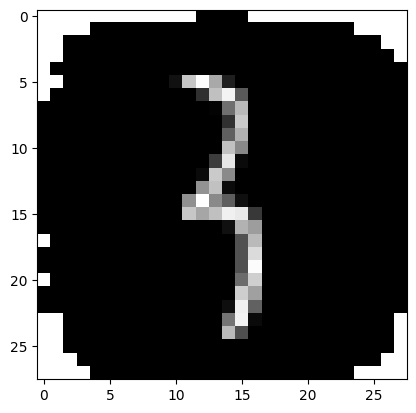

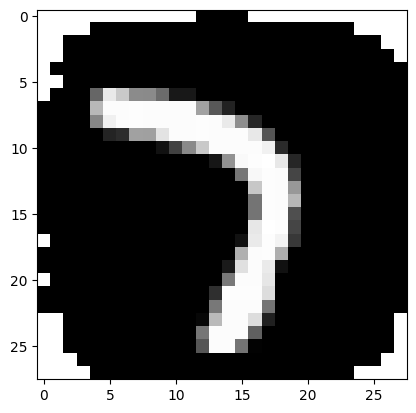

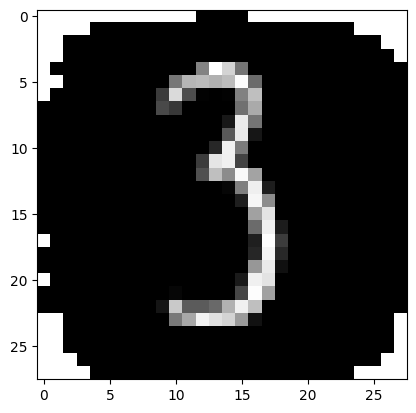

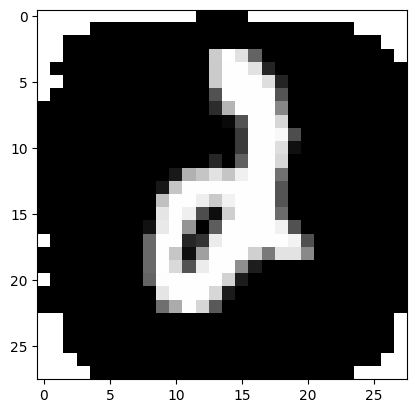

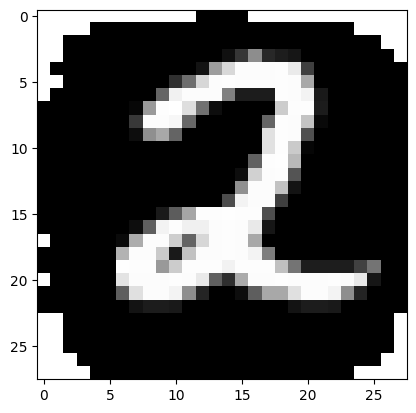

In [129]:
# Answers here
# mnistTrain contains 60,000 images
# Calculate 5 random integers between 0 and 60,000
randomRows = np.random.randint(60000, size=(5))

# Loop though each random row
for randomImage in randomRows:
    # Retrieve the random row
    randomRow = featuresMnistTrain.iloc[randomImage]
    # Convert the 784 pixels into a 28x28 pixel matrix
    image = np.reshape(randomRow, (28,28))
    # Display the image using MatPlotLib
    # "imshow" = image show, "cmap" = colour map
    plt.imshow(image, cmap="gray")
    plt.show()


## 6. Classification using a Perceptron (15 points)

We will use the Perceptron classifier to distinguish between digit '0' and digit '1'. Use only the subset of the data corresponding to these two digits. 

6.1. 	Train the Perceptron on the training data for this binary classification task. (3 points)

In [130]:
# Answers here
# Import the Perceptron class from sklearn
from sklearn.linear_model import Perceptron

# Extract all images of "0" and "1" out of the training dataset
# Create a boolean mask, true/False for each row if row contains 0 or 1
mask1 = labelsMnistTrain.iloc[:,0].isin([0,1])
mask2 = labelsMnistTest.iloc[:,0].isin([0,1])

# Use the mask to filter both the train and test sets
featureTrain = featuresMnistTrain[mask1].copy().reset_index(drop=True)
featureTest = featuresMnistTest[mask2].copy().reset_index(drop=True)
targetTrain = labelsMnistTrain[mask1].copy().reset_index(drop=True).iloc[:,0]
targetTest = labelsMnistTest[mask2].copy().reset_index(drop=True).iloc[:,0]

# Replace all missing values in the feature dataset with black (i.e. 0)
featureTrain.fillna(0, inplace=True)
featureTest.fillna(0, inplace=True)

# Create and train the perceptron
perceptron = Perceptron(
    max_iter=1000,      # Max num of training iteration
    random_state=42,    # For reproducibility
    tol=1e-3            # Stopping tolerance
)
perceptron.fit(featureTrain, targetTrain)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,42


6.2. 	Evaluate the Perceptron on the test set. Print out the test accuracy. (3 points)

In [131]:
# Answers here
# Import the "accuracy_score" class
from sklearn.metrics import accuracy_score

# Use the perceptron to make the predictions
predictions = perceptron.predict(featureTest)

# Calculate the accuracy of the perceptron
# The accuracy of a perceptron measures how often the perceptron 
# makes correct predictions, the closer to 1 (or 100%) the better!
# Accuracy = Correct Predictions / Total Predictions
accuracy = accuracy_score(targetTest, predictions)

# Output the accuracy
print(f"The perceptron has an accuracy of {accuracy:.4f} or {accuracy:.2%}")

The perceptron has an accuracy of 0.9995 or 99.95%


6.3. 	Plot the confusion matrix showing how well the classifier performs on the test set for this binary task. (3 points)

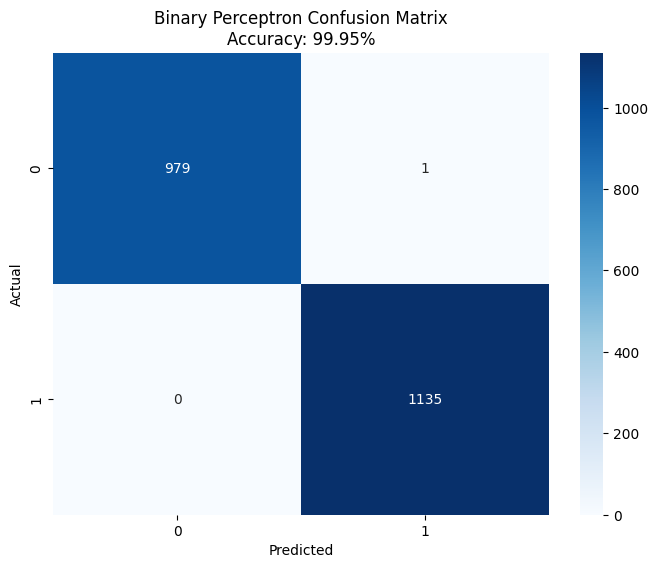

In [132]:
# Answers here
# Import the confusion matrix class from sklearn
from sklearn.metrics import confusion_matrix
# Import seaborn for the heatmap
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(targetTest, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0","1"], yticklabels=["0","1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Binary Perceptron Confusion Matrix\nAccuracy: {accuracy:.2%}")
plt.show()

6.4. Calculate and print the precision, recall, and F1 score for the Perceptron classifier. (3 points)

In [133]:
# Answers here
# What are precision, recall and F1 score?

# Precision = Measures the accuracy of positive predictions, 
#     i.e. "Of all the items the model labels as positive, how many were actually positive?"

# Recall (Sensitivity) = Measures the model's ability to find all the positive instances, 
#     i.e. "Of all the actual positives, how many did the model correctly identify?"

# F1 Score = A balence of precision and recall into a single number.


# Import the necessary libararies
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Calculate the precision, recall and f1 score
precision = precision_score(targetTest, predictions)
recall = recall_score(targetTest, predictions)
f1 = f1_score(targetTest, predictions)

# Output the scores
print("=== BINARY PERCEPTRON PERFORMANCE ===")
print(f"Precision: {precision:.4f} | {precision:.2%}")
print(f"Recall: {recall:.4f} | {recall:.2%}")
print(f"F1 Score: {f1:.4f} | {f1:.2%}")

=== BINARY PERCEPTRON PERFORMANCE ===
Precision: 0.9991 | 99.91%
Recall: 1.0000 | 100.00%
F1 Score: 0.9996 | 99.96%


 6.5 Implement a multi-class Perceptron classifier for all 10 digits. Train and evaluate it on the full dataset. Print the overall accuracy. (2 points)

In [134]:
# Answers here
# Main dataset already split up into train and test pairs
# Training sets: "featuresMnistTrain" and "labelsMnistTrain"
# Testing sets: "featuresMnistTest" and "labelsMnistTest"

# Replace all missing values with 0
featuresMnistTrain.fillna(0, inplace=True)
featuresMnistTest.fillna(0, inplace=True)

# Create the mutli-class perceptron
# The perceptron class automatically handels multiple classes
perceptron = Perceptron(
    max_iter=1000,
    random_state=42,
    tol=1e-3
)
# Fit the perceptron on the training data
perceptron.fit(featuresMnistTrain, labelsMnistTrain.iloc[:,0])

# Make the predictions based on the test dataset
predictions = perceptron.predict(featuresMnistTest)

# Calculate all the metrics
# "average='weighted'" used if the classes are balenced
accuracy = accuracy_score(labelsMnistTest, predictions)
precision = precision_score(labelsMnistTest, predictions, average="weighted")
recall = recall_score(labelsMnistTest, predictions, average="weighted")
f1 = f1_score(labelsMnistTest, predictions, average="weighted")

# Output the metrics for the multi-class perceptron
print("=== MULTI-CLASS PERCEPTRON PERFORMANCE ===")
print(f"Accuracy: {accuracy:.4f} | {accuracy:.2%}")
print(f"Precision: {precision:.4f} | {precision:.2%}")
print(f"Recall: {recall:.4f} | {recall:.2%}")
print(f"F1 Score: {f1:.4f} | {f1:.2%}")

=== MULTI-CLASS PERCEPTRON PERFORMANCE ===
Accuracy: 0.8650 | 86.50%
Precision: 0.8748 | 87.48%
Recall: 0.8650 | 86.50%
F1 Score: 0.8629 | 86.29%


 6.6 Plot a confusion matrix for your multi-class classifier. (1 point)

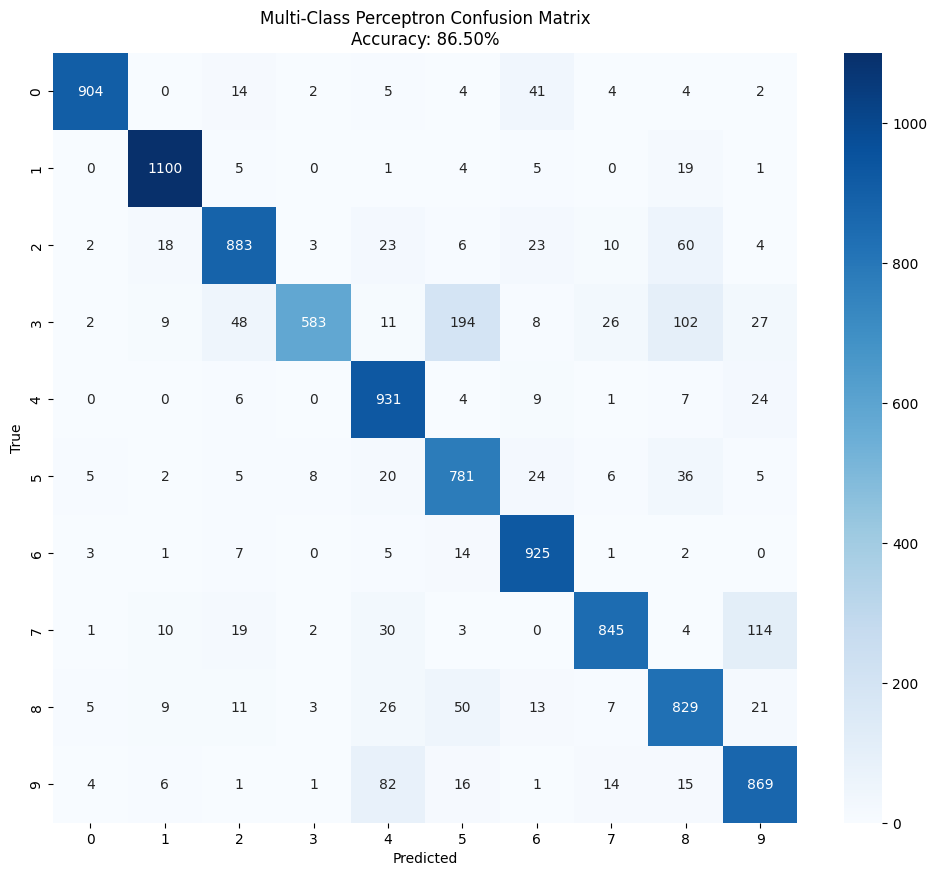

In [136]:
# Answers here
# Calculate the confusion matrix
cm = confusion_matrix(labelsMnistTest, predictions)

# Plot the confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Multi-Class Perceptron Confusion Matrix\nAccuracy: {accuracy:.2%}")
plt.show()

## 7. Classification with Logistic Regression (15 points)

Now we will implement a Logistic Regression classifier for the same binary classification task as with the perceptron.

7.1. 	Train the Logistic Regression model on the training data for this binary classification task. (3 points)

In [137]:
# Answers here
# Difference between Logistic Regression and the Perceptron
#     Perceptron = step function, output is either 0 or 1
#     Logistic = sigmoid function, output is a probability

# Logistic Regression Steps
# 1: Weighted Sum
#     z = W1X1 + W2X2 + ... + WnXn + bias
# 2: Apply Sigmoid Function
#     probability = 1 / (1 + e^(-z))
# 3: Convert to class prediction
#     if probability >= 0.5: prediction = 1
#     else: prediction = 0

# Why?: Logistic regression is better since instead of saying "It is class 1", it says "I am 95% certain that it is class 1"


# Import the LogisticRegression class from scikit-learn
from sklearn.linear_model import LogisticRegression

# Extract all images of "0" and "1" out of the training dataset
# Create a boolean mask, true/False for each row if row contains 0 or 1
mask1 = labelsMnistTrain.iloc[:,0].isin([0,1])
mask2 = labelsMnistTest.iloc[:,0].isin([0,1])

# Use the mask to filter both the train and test sets
featureTrain = featuresMnistTrain[mask1].copy().reset_index(drop=True)
featureTest = featuresMnistTest[mask2].copy().reset_index(drop=True)
targetTrain = labelsMnistTrain[mask1].copy().reset_index(drop=True).iloc[:,0]
targetTest = labelsMnistTest[mask2].copy().reset_index(drop=True).iloc[:,0]

# Replace all missing values in the feature dataset with black (i.e. 0)
featureTrain.fillna(0, inplace=True)
featureTest.fillna(0, inplace=True)

# Create the logistic regression model
logReg = LogisticRegression(
    max_iter=1000,      # Max interations
    random_state=42,    # For preproducibility
    solver="lbfgs"      # Optimisation algorithm
)

# Train the model on the training data
logReg.fit(featureTrain, targetTrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


7.2. 	Evaluate the Logistic Regression model on the test set. Print out the test accuracy. (3 points)

In [138]:
# Answers here
# Make the predictions using the testing dataset
predictions = logReg.predict(featureTest)

# Retrieve the probabilities for each class
probabilities = logReg.predict_proba(featureTest)

# Calculate the accuracy
accuracy = accuracy_score(targetTest, predictions)
print(f"Accuracy: {accuracy:.4f} | {accuracy:.2%}")

Accuracy: 0.9995 | 99.95%


7.3. 	Plot the confusion matrix for the Logistic Regression model on this binary task. (3 points)

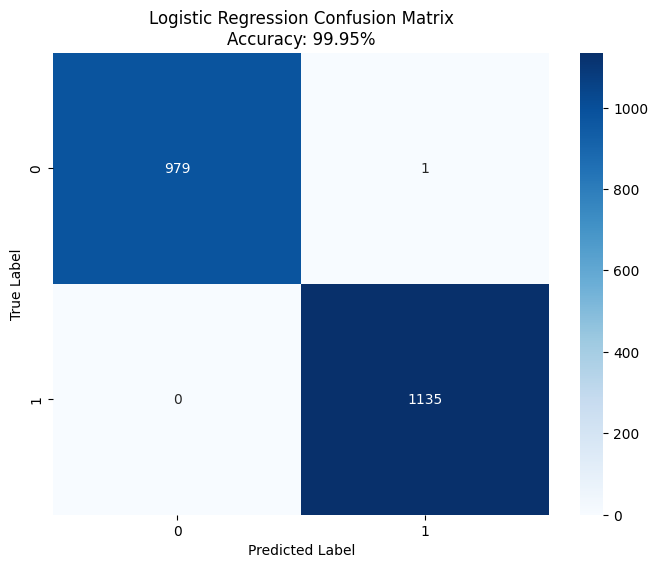

In [139]:
# Answers here
# Calculate and display the confusion matrix
cm = confusion_matrix(targetTest, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Logistic Regression Confusion Matrix\nAccuracy: {accuracy:.2%}')
plt.show()

7.4. 	Calculate and print the precision, recall, and F1 score for the Logistic Regression classifier (3 points)

In [140]:
# Answers here
# Calculate the precision, recall and f1 score
precision = precision_score(targetTest, predictions)
recall = recall_score(targetTest, predictions)
f1 = f1_score(targetTest, predictions)

# Output the metrics
print("=== BINARY LOGISTIC REGRESSION PERFORMANCE ===")
print(f"Precision: {precision:.4f} | {precision:.2%}")
print(f"Recall: {recall:.4f} | {recall:.2%}")
print(f"F1 Score: {f1:.4f} | {f1:.2%}")

=== BINARY LOGISTIC REGRESSION PERFORMANCE ===
Precision: 0.9991 | 99.91%
Recall: 1.0000 | 100.00%
F1 Score: 0.9996 | 99.96%


7.5 Implement a multi-class Logistic Regression classifier for all 10 digits. Train and evaluate it on the full dataset. Print the overall accuracy. (2 points)

In [141]:
# Answers here
# Main dataset has already been split up

# Ensure no missing values are present in the train or test datasets
featuresMnistTrain.fillna(0, inplace=True)
featuresMnistTest.fillna(0, inplace=True)

# Create a multi-class logistic regression model
multiLogReg = LogisticRegression(
    max_iter=1000,      # Max interations
    random_state=42,    # For preproducibility
    solver="lbfgs"      # Optimisation algorithm
)

# Train the model on the training dataset
multiLogReg.fit(featuresMnistTrain, labelsMnistTrain.iloc[:,0])

# Make the predictions based on the testing dataset
predictions = multiLogReg.predict(featuresMnistTest)

# Calculate the accuracy, precision, recall and f1 score
accuracy = accuracy_score(labelsMnistTest.iloc[:,0], predictions)
precision = precision_score(labelsMnistTest.iloc[:,0], predictions, average="weighted")
recall = recall_score(labelsMnistTest.iloc[:,0], predictions, average="weighted")
f1 = f1_score(labelsMnistTest.iloc[:,0], predictions, average="weighted")

# Output the results
print(f"Accuracy: {accuracy:.4f} | {accuracy:.2%}")
print(f"Precision: {precision:.4f} | {precision:.2%}")
print(f"Recall: {recall:.4f} | {recall:.2%}")
print(f"F1 Score: {f1:.4f} | {f1:.2%}")

Accuracy: 0.9266 | 92.66%
Precision: 0.9264 | 92.64%
Recall: 0.9266 | 92.66%
F1 Score: 0.9264 | 92.64%


 7.6 Plot the confusion matrix for the multi-class Logistic Regression classifier. (1 point)

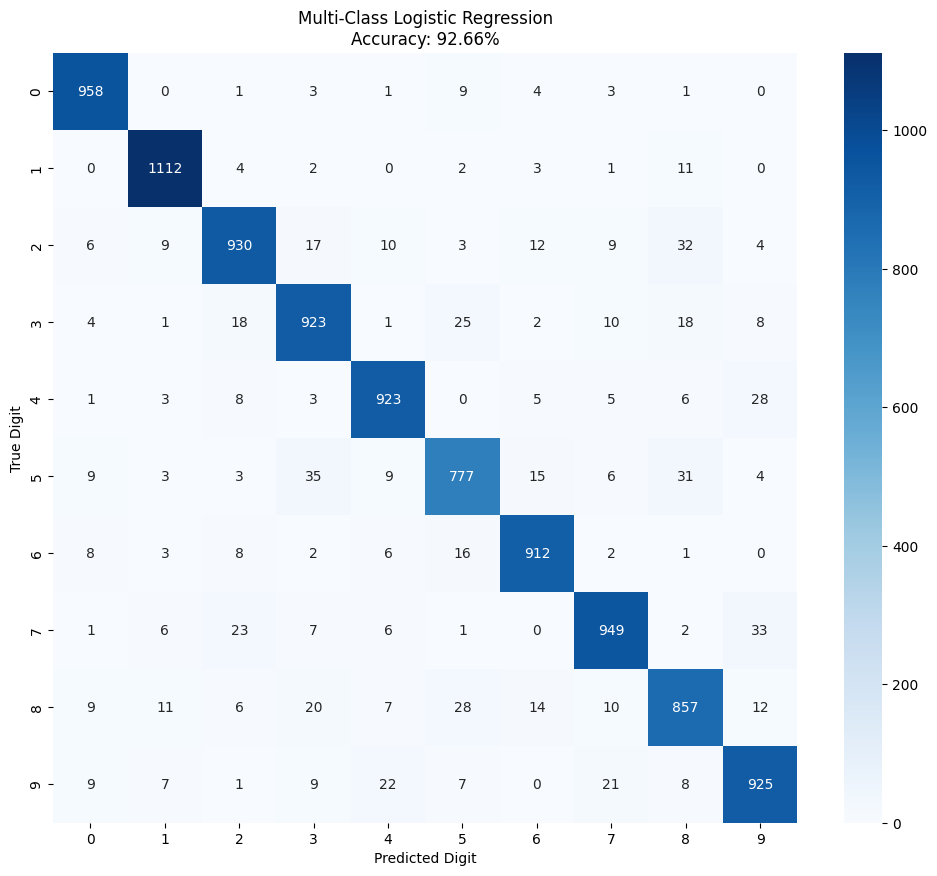

In [142]:
# Answers here
# Calculate the display the confusion matrix
cm = confusion_matrix(labelsMnistTest, predictions)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Digit')
plt.ylabel('True Digit')
plt.title(f'Multi-Class Logistic Regression\nAccuracy: {accuracy:.2%}')
plt.show()

## 8. Model Comparison and Analysis (7 points)

8.1. For the multi-class Logistic Regression model, identify the three digits that are most frequently misclassified (i.e. classified wrong). Using the same `numpy.reshape` code as in question 5.4, display example images of these misclassified data points (4 points)

Digit 5 is the first most frequently misclassified digit, as digit 3!
Digit 7 is the second most frequently misclassified digit, as digit 9!
Digit 2 is the third most frequently misclassified digit, as digit 8!


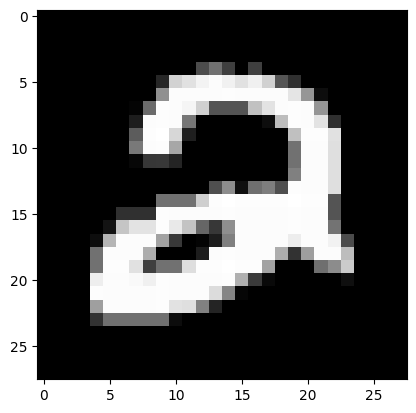

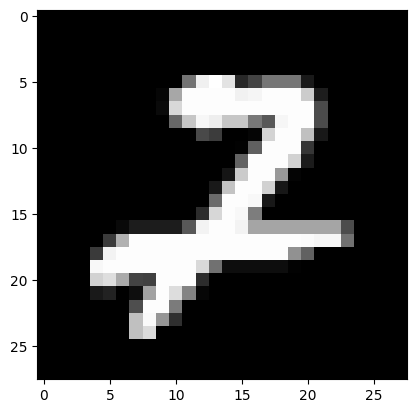

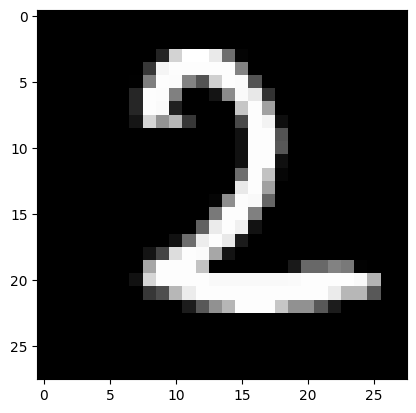

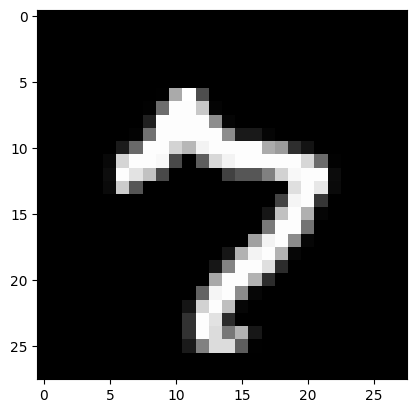

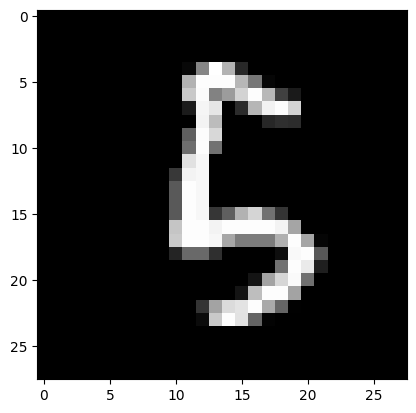

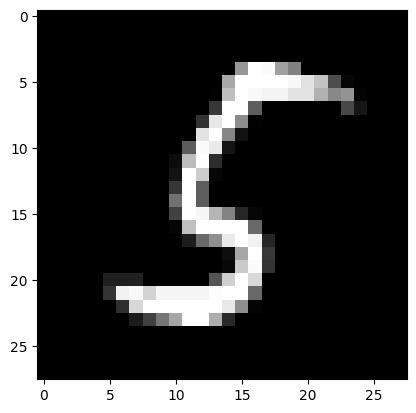

In [143]:
# Answers here
# Set highest misclassified num
highest = 0
secondHighest = 0
thirdHighest = 0
# Set the array to hold the position of the highest
position1 = [-1,-1]
position2 = [-1,-1]
position3 = [-1,-1]

# Identify which position contains the largest misclassified num, which is not on the diagonal
# Using the Confusion Matrix calculated for the Mutli-Class Logistic Regression Model
# Loop through each row
for i in range(10):
    # Loop through each cell in the current row
    for j in range(10):
        # Checking if new misclassified num is the highest so far
        if (i != j) and (cm[i,j] > highest):
            # Shift 2nd place down
            thirdHighest = secondHighest
            position3 = position2
            # Shift 1st place down
            secondHighest = highest
            position2 = position1
            # Set new highest
            highest = cm[i,j]
            position1 = [i,j]
        # Checking if we have found a new second highest
        elif (i != j) and (cm[i,j] > secondHighest):
            # Shift 2nd place down
            thirdHighest = secondHighest
            position3 = position2
            # Set new 2nd place
            secondHighest = cm[i,j]
            position2 = [i,j]
        # Checking if we have found a new third highest
        elif (i != j) and (cm[i,j] > thirdHighest):
            # Set new 3rd place
            thirdHighest = cm[i,j]
            position3 = [i,j]

# Output which digit is predicted wrong the most
print(f"Digit {position1[0]} is the first most frequently misclassified digit, as digit {position1[1]}!")
print(f"Digit {position2[0]} is the second most frequently misclassified digit, as digit {position2[1]}!")
print(f"Digit {position3[0]} is the third most frequently misclassified digit, as digit {position3[1]}!")

# Top 3 most misclassified digits
first = position1[0]
second = position2[0]
third = position3[0]

# Keep track of how many images are found
firstCount = 0
secondCount = 0
thirdCount = 0

# Extract a random image to show this misclassification
while True:
    # Generate random num
    randomImage = np.random.randint(len(featuresMnistTest))
    # Check if this random image is "frist", "second" or "third"
    if labelsMnistTest.iloc[randomImage,0] == first and firstCount < 2:
        # If so, display this image
        # Convert the 784 pixels into a 28x28 pixel matrix
        image = np.reshape(featuresMnistTest.iloc[randomImage], (28,28))
        # Display the image using MatPlotLib
        # "imshow" = image show, "cmap" = colour map
        plt.imshow(image, cmap="gray")
        plt.show()
        # Increment counter
        firstCount += 1
    elif labelsMnistTest.iloc[randomImage,0] == second and secondCount < 2:
        # If so, display this image
        # Convert the 784 pixels into a 28x28 pixel matrix
        image = np.reshape(featuresMnistTest.iloc[randomImage], (28,28))
        # Display the image using MatPlotLib
        # "imshow" = image show, "cmap" = colour map
        plt.imshow(image, cmap="gray")
        plt.show()
        # Increment counter
        secondCount += 1
    elif labelsMnistTest.iloc[randomImage,0] == third and thirdCount < 2:
        # If so, display this image
        # Convert the 784 pixels into a 28x28 pixel matrix
        image = np.reshape(featuresMnistTest.iloc[randomImage], (28,28))
        # Display the image using MatPlotLib
        # "imshow" = image show, "cmap" = colour map
        plt.imshow(image, cmap="gray")
        plt.show()
        # Increment counter
        thirdCount += 1
    # Ensure we are only printing 2 of each digit
    elif firstCount == 2 and secondCount == 2 and thirdCount == 2: break

8.2. Compare the performance of the Perceptron and Logistic Regression models on the binary classification and multi-class tasks. Which performed better? Explain why you think this is the case (3 points)

*Answers here (double click to edit this cell)*  

=== Binary Classification ===  
Perceptron:  
 - Accuracy = 0.9995  
 - Precision = 0.9991  
 - Recall = 1.0000  
 - F1 = 0.9996  

Logistic:  
 - Accuracy = 0.9995  
 - Precision = 0.9991  
 - Recall = 1.0000  
 - F1 = 0.9996  

From the metrics above, you can see that both the perceptron and logistic regression models performed the same. This is due to the problem being a simple binary classification. The two classes are easily separable, meaning the perceptron classifier can easily find the correct desision boundary for this given problem. The advantages of the logistic model aren't used to a large degree in this problem, resulting in its performance matching the perceptron.
<br>
<br>

=== Multi-Class ===  
Perceptron:  
 - Accuracy = 0.8650  
 - Precision = 0.8748  
 - Recall = 0.8650  
 - F1 = 0.8629  

Logistic:  
 - Accuracy = 0.9266  
 - Precision = 0.9264  
 - Recall = 0.9266  
 - F1 = 0.9264  

Multi-class classification is much more complicated than simple binary classification. This is why the simple perceptron classifier acheived a lower accuracy given the same number of training interations.  
The advantages of the logistic model play a big part in the performace with multi-class classification. The logistic regression model updates its weights on every iteration, even for almost misclassified examples. On the other hand, the perceptron will only update its weights when it is completely wrong. This means that the logistic model can learn the patterns in the data much faster and more accuratly than the perceptron, leading to a more performant classification model. 

## 9. Understanding Machine Learning (8 points)

9.1. How might you modify the input data or feature representation to potentially improve the performance of these models on the MNIST dataset? Suggest at least two specific techniques (4 points).

*Answers here (double click to edit this cell)*
1. **Dimensionality Reduction**
    - The MNIST dataset contains thousands of 28x28 images = 784 features per image
    - Each pixel is treated as a separate feature, however many pixels are known as being correlated, i.e. nearby pixels have similar intensities
    - Dimensionality methods include PCA (Principle Component Analysis) or LDA (Linear Discriminant Analysis)
    - These methods aim to find a new set of smaller features that still capture most of the important variation in the data
    - This reduction in feature size can improve several performance factors, such as speeding up the training process since less features are present, reduces noise and redundent information, and often improve the generalisation of the model because it can focus on the major visual patters rather than pixel level noise

2. **Derived Features**
    - This involves creating new, more meaningful features from the raw pixel data
    - This technique can extract higher-level representations from the raw pixels that make patterns easier to identify
    - Some dervided features include;
        - Total Ink: sum of all pixel intensities, this measures how "thick" or "bold" the digit is
        - Centre of mass: calculate where most of the ink is, digits like "9" or "6" have different centre of masses
        - Aspect ratio of bounding box: width vs height of the digit's bounding box. Digits like "1" and "8" generally have significantly different aspect ratios
    - The raw pixel data doesn't encode the structure of the digit, so these derived digits can highlight the shape and style of the digit, which is more informative
    - Classification models such as the perceptron and logistic regression will then have a higher likelyhood of classifying the digit correctly, improving the models performance

9.2. Explain the importance of the train-test split in this context. What might happen if you trained and evaluated the models on the entire dataset without splitting?  (4 points)

*Answers here (double click to edit this cell)*  

The training dataset is used by the model to learn patterns in the data, adjust weights and fit parameters. On the other hand, the testing dataset is used to evaluate how well the mdoel performs on new, unseen data.  

If the models were trained and tested on the entire MNIST dataset, they would memorise rather than understand the patterns of each digit. Example, rather than understanding the characteristics of the digit "3", they would memorise bit patterns and associate them to the digit "3", or another.  

Training and testing the models on the entire dataset would result in a high "training accuracy", but this doesn't demonstrate the model's real-world performance. We split the dataset into two parts so we can test the model's ability to generalise.  

Futhermore, by splitting the dataset up, it helps to detect overfitting. Given the scenario where the training accuracy was 99% but the testing accuracy was 85%. This is a clear sign that overfitting has occured. Therefore, you can revisit the model structure or modify the input data. Example; in the training set, the model might memorise that the digit "4" has a gap at the top, but the test set might contain a "4" that is written differently - splitting helps avoid this.  

Similarly, when comparing the performance of different models to see which might perform the best, by splitting up the dataset you can get a fair comparison of the performance of each model on the same train and test sets. Example; some models may have similar training accuracy but generalise better so have a higher test accuracy. Without splitting the data you wouldn't be able to identify this difference - potentially choosing the wrong model.  

On the 10th June 2024 Apple announced IOS 18, alongside the 18th major release of their other operating systems. As part of this release, Apple announced a new feature called Math Notes. This feature allowed anyone with an iPhone or iPad to write handwritten mathematical equations in their Apple Notes application and the software would automatically recognise these handwritten letters and numbers to solve the given equations.  

If Apple didn't use some form of train-test split on their datasets, this major feature would have been a disaster.